Required Packages

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Plot maximum four histograms on a single chart**

In [16]:

def plot_comparison(df, Score):
    Score=Score
    # Extract entities
    entities =[
        "Vessel Name", "Offense Information", "Vessel flag at the time of the offence",
        "Vessel flag at other times if applicable", "Vessel movement", "Owner name",
        "Owner address", "Owner country", "Entity Identity Information", "Goods Onboard",
        "Arrest Information", "Crew Information and People on Board"]

    # Number of datasets
    num_datasets = df.shape[1]-1

    # Plotting
    plt.figure(figsize=(12, 8))

    # Width of each bar
    bar_width = 0.2

    # Positions of entities on x-axis for each dataset
    positions = np.arange(len(entities))

    Chosen_score = df.columns[1:].tolist()

    # Plot each dataset in the same subplot with different colors
    for i in range(num_datasets):

      plt.bar(positions + i * bar_width, df[Chosen_score[i]] ,
                width=bar_width, label=Chosen_score[i])

    # Customize the plot
    plt.xlabel('Entity')
    plt.ylabel(str(Score))
    plt.title(f'Comparison of {Score} Scores for Different Entities')
    plt.xticks(positions + (num_datasets - 1) * bar_width / 2, entities, rotation=90)
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming df is already defined as pd.DataFrame(data)
# plot_precision_comparison(df)


# **The following code works as follows:**


1.   First, it reads a csv file, upload "score_results.csv"
2.   Then ask you to enter the name of a score
3.   when it asks about "specific string", you need to enter full settings:

*   For example:
      settings:chunk_size:500,chunk_overlap:50,embed_model:nomic-embed-text,llm:gemma,temperature:Unknown,top_k:Unknown,top_p:0.1,verbose:False

4.  You can enter up to four settings, becareful to enter distinct settings.
5. At the end it shows the comparison plot.






Enter the path to the CSV file: /content/scores_results.csv
Enter the name of the score: cos
Enter specific string 1 to search for in the 'settings' column (or enter 'done' to finish): settings:chunk_size:3000,chunk_overlap:250,embed_model:mxbai-embed-large,llm:gemma,temperature:Unknown,top_k:Unknown,top_p:0.1,verbose:False
Enter specific string 2 to search for in the 'settings' column (or enter 'done' to finish): settings:chunk_size:3000,chunk_overlap:250,embed_model:mxbai-embed-large,llm:gemma,temperature:Unknown,top_k:Unknown,top_p:0.2,verbose:False
Enter specific string 3 to search for in the 'settings' column (or enter 'done' to finish): settings:chunk_size:3000,chunk_overlap:250,embed_model:mxbai-embed-large,llm:gemma,temperature:Unknown,top_k:Unknown,top_p:0.5,verbose:False
Enter specific string 4 to search for in the 'settings' column (or enter 'done' to finish): settings:chunk_size:3000,chunk_overlap:250,embed_model:mxbai-embed-large,llm:gemma,temperature:Unknown,top_k:Unknown

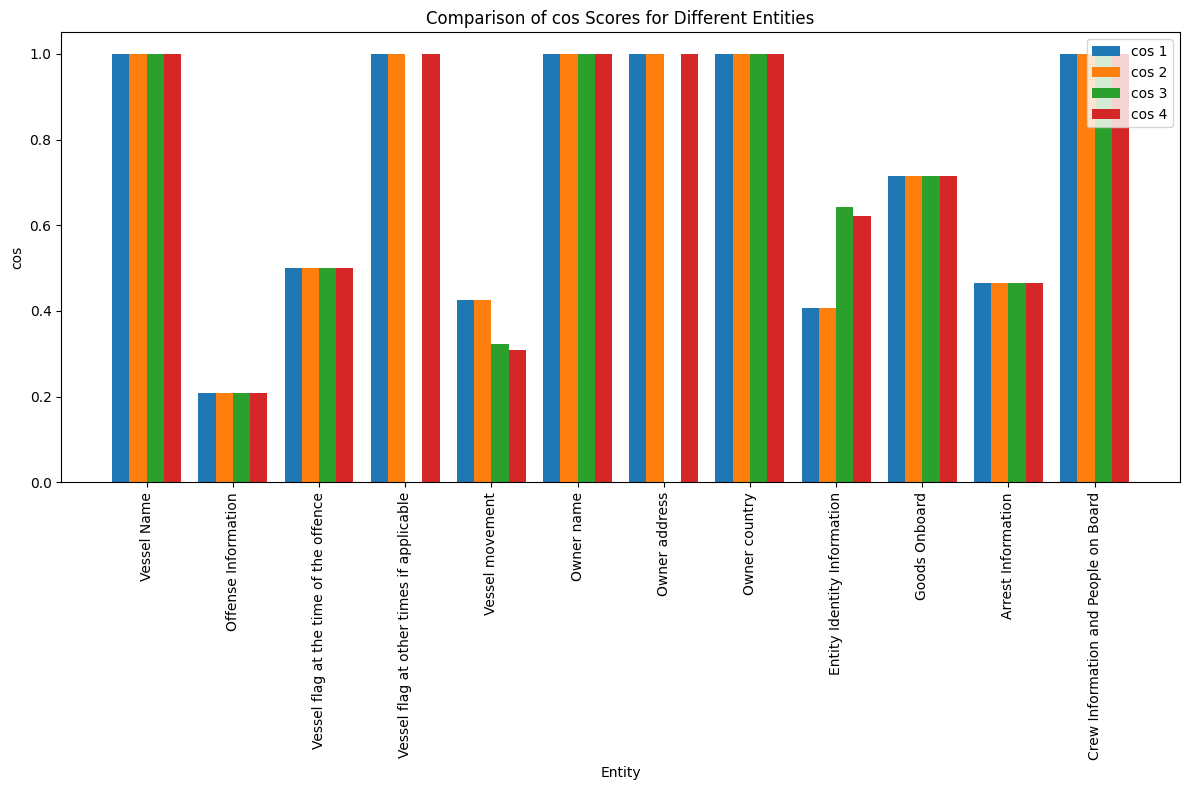

In [18]:
import pandas as pd

def find_first_index_of_specific_strings():
    # Prompt user to enter path to CSV file
    csv_path = input("Enter the path to the CSV file: ").strip()

    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"Error: File '{csv_path}' not found.")
        return
    except pd.errors.EmptyDataError:
        print(f"Error: File '{csv_path}' is empty.")
        return
    except pd.errors.ParserError:
        print(f"Error: Unable to parse file '{csv_path}'. Make sure it's a valid CSV file.")
        return

    entities = [
        'Vessel Name', "Offense Information", "Vessel flag at the time of the offence",
        "Vessel flag at other times if applicable", "Vessel movement", "Owner name",
        "Owner address", "Owner country", "Entity Identity Information", "Goods Onboard",
        "Arrest Information", "Crew Information and People on Board"
    ]

    # Initialize list to store specific strings
    Score = input("Enter the name of the score: ").strip()
    specific_strings = []
    slice_list = []

    # Prompt user to enter up to 4 different specific strings
    for i in range(4):
        while True:
            specific_string = input(f"Enter specific string {i+1} to search for in the 'settings' column (or enter 'done' to finish): ").strip()

            if specific_string.lower() == 'done':
                break
            elif specific_string in specific_strings:
                print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
                print(f"Error: ' This setting has already been entered. Please enter a different specific string.")
                print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
            else:
                specific_strings.append(specific_string)
                break

    if not specific_strings:
        print("No specific strings entered.")
        return

    # Print entered specific strings for verification
    #print("Entered specific strings:")
    #for idx, specific_string in enumerate(specific_strings):
        #print(f"{idx + 1}. {specific_string}")

    print("**********************************************************")
    print("**********************************************************")

    # Find and print the index of the first occurrence for each specific string
    for j, specific_string in enumerate(specific_strings):
        print(f'{Score} {j+1} = {specific_string}')
        # Find the index of the first row containing the specific string
        index = df.index[df['settings'].str.contains(specific_string, na=False)].min()
        df_selected = df.iloc[index:index+12]  # Assuming you want 12 rows starting from 'index'
        slice_list.append(df_selected[Score].reset_index(drop=True))

    df_concat = pd.concat([pd.Series(entities)] + slice_list, axis=1)

    # Rename columns as per your requirement
    new_columns = ['entity'] + [f'{Score} {i+1}' for i in range(len(slice_list))]
    df_concat.columns = new_columns

    # Display the resulting table
    print("**********************************************************")
    print("**********************************************************")
    # now the comparison
    plot_comparison(df_concat, Score)

def plot_comparison(df, Score):
    # Extract entities
    entities = [
        "Vessel Name", "Offense Information", "Vessel flag at the time of the offence",
        "Vessel flag at other times if applicable", "Vessel movement", "Owner name",
        "Owner address", "Owner country", "Entity Identity Information", "Goods Onboard",
        "Arrest Information", "Crew Information and People on Board"
    ]

    # Number of datasets
    num_datasets = df.shape[1] - 1

    # Plotting
    plt.figure(figsize=(12, 8))

    # Width of each bar
    bar_width = 0.2

    # Positions of entities on x-axis for each dataset
    positions = np.arange(len(entities))

    Chosen_score = df.columns[1:].tolist()

    # Plot each dataset in the same subplot with different colors
    for i in range(num_datasets):
        plt.bar(positions + i * bar_width, df[Chosen_score[i]],
                width=bar_width, label=Chosen_score[i])

    # Customize the plot
    plt.xlabel('Entity')
    plt.ylabel(str(Score))  # Ensure Score is converted to string if necessary
    plt.title(f'Comparison of {Score} Scores for Different Entities')
    plt.xticks(positions + (num_datasets - 1) * bar_width / 2, entities, rotation=90)
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    find_first_index_of_specific_strings()
